<h1><center> Assignment 3: Practical Data Science</center></h1>
<h2><center> Topic 1.2: Online Shoppers Purchasing Intention</center></h2>
<h2><center> Group 23</center></h2>

In [258]:
# Data Analysis and visualization tools
# Importing packages - Pandas, Numpy, Seaborn, Scipy
!pip install ipympl
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm
import random 

np.random.seed(0)

# Modelling - LR, KNN, NB, Metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn import svm
from sklearn.metrics import silhouette_score

%matplotlib inline

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

# 1. Retrieving and Preparing the Data

## 1.1: Loading data 

In [259]:
# Loading data from CSV file into DataFrame
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Column Description
- Administrative: page type administrative that user visited.
- Administrative_Duration: amount of time spent in administrative pages.
- Informational: page type informational that user visited.
- Informational_Duration: amount of time spent in informational  pages.
- ProductRelated: page type product related that user visited.
- ProductRelated_Duration: amount of time spent in this product related pages.
- BounceRates: percentage of visitors who enter the website without doing any additional tasks. 
- ExitRates: percentage of pageviews on the website that end at that specific page.
- PageValues: average value of the page averaged over the value of the target page.
- SpecialDay: value the closeness of the browsing date to special days or holidays.
- Month: month of the pageview occurred.
- OperatingSystems: operating system used to view the page.
- Browser: browser used to view the page.
- Region: region the user is located.
- TrafficType: type of traffic the user is categorized into.
- VisitorType: representing whenther a visitor is New Visitor, Returning Visitor, or Other.
- Weekend: representing whether the session is on a weekend.
- Revenue: representing whether or not the user completed the purchase.

In [260]:
# Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [261]:
#remove whitespace for columns which are object dtype
cols = df.select_dtypes(object).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())

### Observation 1 - Missing value
Overall, there are total 12330 rows. It is showed that each column also contains 12330 non-null count, which is equal to the number of rows. Hence, there is no missing value 

In [262]:
# Get DataFrame describe
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Observation 2 - Data Description
- Administrative: numerical, quantitative, ratio. Min: 0, Max: 27
- Administrative_Duration: numerical, quantitative, ratio. Min: 0, Max: 3398.75
- Informational: numerical, quantitative, ratio. Min: 0, Max: 24
- Informational_Duration: numerical, quantitative, ratio. Min: 0, Max: 2549.3750
- ProductRelated: numerical, quantitative, ratio. Min: 0, Max: 705
- ProductRelated_Duration: numerical, quantitative, ratio. Min: 0, Max: 63973.52223
- BounceRates: numerical, quantitative, ratio. Min: 0, Max: 0.2
- ExitRates: numerical, quantitative, ratio. Min: 0, Max: 0.2
- PageValues: numerical, quantitative, ratio. Min: 0, Max: 0.2
- SpecialDay: categorical, qualitative, nominal. No/Yes: 0/1
- Month: string of months (Feb, Mar, May, June, Jul, Aug, Sep, Nov, Dec)
- OperatingSystems: categorical, qualitative, interval. Min: 1, Max: 8
- Browser: categorical, qualitative, interval. Min: 1, Max: 13
- Region: categorical, qualitative, interval. Min: 1, Max: 9
- TrafficType: categorical, qualitative, interval. Min: 1, Max: 20
- VisitorType: string represent type of visitors (New Visitor, Returning Visitor, Other)
- Weekend: boolean, True/False
- Revenue: boolean, True/False

## 1.2: Check null data

In [263]:
# Null data checking 
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [264]:
# missing percentage of the data
missing_percentage = df.isnull().sum()/df.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


### Observation 3 - Null Data
There is no null data

## 1.3: Check duplicated data

In [265]:
# Find duplicated data
mask = (df.duplicated() == True)
df[mask]
print(df[mask].shape)
df[mask]

(125, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
540,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
554,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
589,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


### Observation 4 - duplicated data
There are 125 rows that are duplicated. To keep the data clear for the purpose of analyzing, those rows will be deleted

In [266]:
# Dropping duplicated data
df = df.drop_duplicates()

## 1.4: Check typos error in non-numeric columns

In [267]:
df["Month"].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [268]:
df["Weekend"].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

In [269]:
df["Revenue"].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [270]:
df["VisitorType"].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

### Observation 5 - Typos Error
There are no errors relating to typing. All the names in those 4 columns above are written correctly

## 1.5: Check distribution of target variable

In [271]:
# Checking the distribution of target variable
display(df['Revenue'].value_counts().reset_index()
        .rename(columns = {'index' : 'Revenue', 'Revenue' : 'Amount'}), 
    (df['Revenue'].value_counts(normalize = True)*100).reset_index()
        .rename(columns = {'index' : 'Revenue', 'Revenue' : 'Percent'}))

,Revenue,Amount
0,False,10297
1,True,1908


,Revenue,Percent
0,False,84.367063
1,True,15.632937


### Observation 6 - Distribution of the target variable
Among 12,205 customers, only 1908 (nearly 15.633%) accepted to complete the purchase on the website

## 1.6: Graph and Analyze

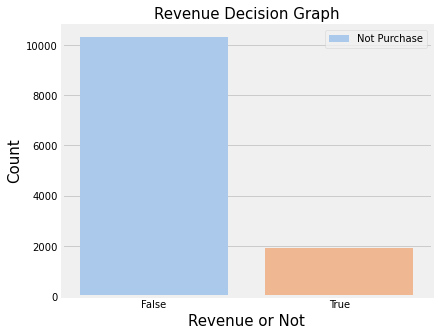

In [272]:
#Graph distribution of target variable
plt.rcParams['figure.figsize'] = (13, 5)
labels = "Not Purchase", "Purchase"
plt.subplot(1, 2, 1)
sns.countplot(x = df['Revenue'], palette = 'pastel')
plt.title('Revenue Decision Graph', fontsize = 15)
plt.xlabel('Revenue or Not', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(labels, loc='best', bbox_to_anchor=(1, 1))
plt.show()

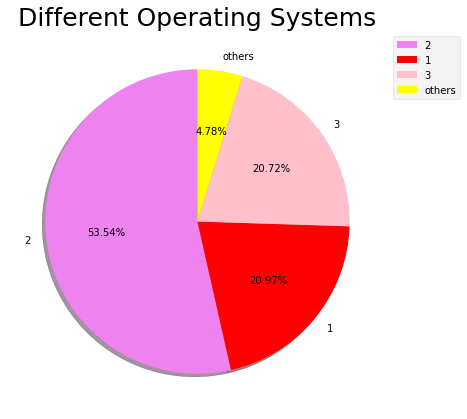

In [273]:
# Plotting a pie chart for Operating Systems
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'red', 'pink', 'yellow']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 25)
plt.axis('off')
plt.legend(labels, loc='best', bbox_to_anchor=(1, 1))
plt.show()

### Observation 7: Distribution of Different Operation Systems
Top 3 Operating Systems take approximately 95% of this dataset. So our team decided to focus on them to increase our business.

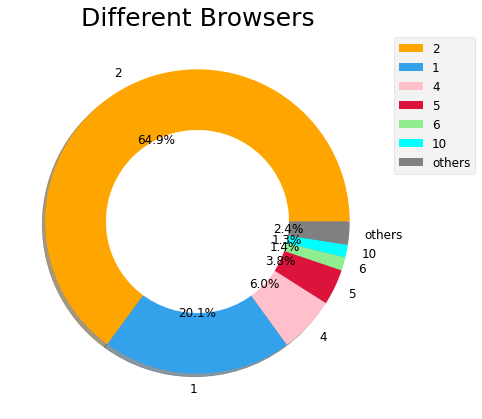

In [274]:
# Ploting a donut chart for browser 
plt.rcParams['figure.figsize'] = (18, 7)
plt.rcParams['font.size'] = '12'

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', '#34a1eb', 'pink', 'crimson', 'lightgreen', 'cyan', 'gray']
labels = "2", "1", "4", "5", "6", "10", "others"

explode = [0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.1f%%')
plt.title('Different Browsers', fontsize = 25)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend(labels, loc='best', bbox_to_anchor=(1, 1))
plt.show()

### Observation 8:  Distribution of browsers
About 90% of users used only top 3 browsers:
   - 64.9% for browser 2
   - 20.1% for browser 1
   - 6.0% for browser 4

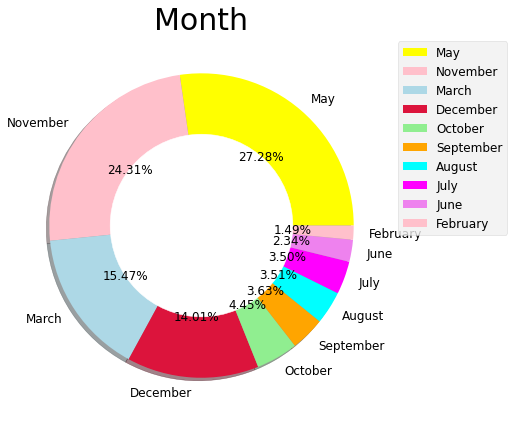

In [275]:
# Creating a donut chart for the months variations
# Plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend(labels, loc='best', bbox_to_anchor=(1, 1))
plt.show()

### Observation 9:  Distribution of Month
Top 4 months for viewing pages:
   - 27.28% (highest percent) on May
   - 24.31% on November
   - 15.47% on March
   - 14.01% on December

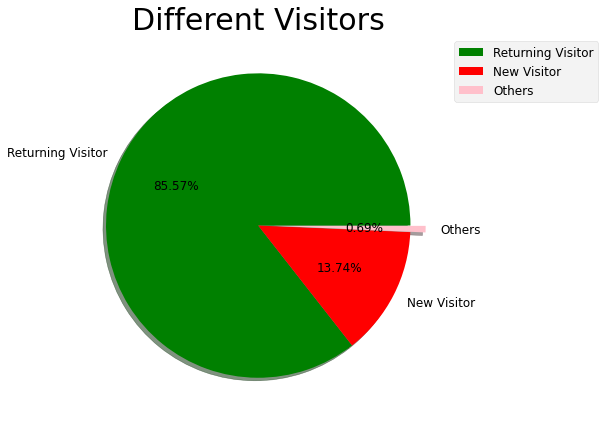

In [276]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['green', 'red', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend(labels, loc='best', bbox_to_anchor=(1, 1))
plt.show()

### Observation 10: Visitors
More than 85% visitors are returning visitors, which is a large statistic number. This information may helpful for marketing.

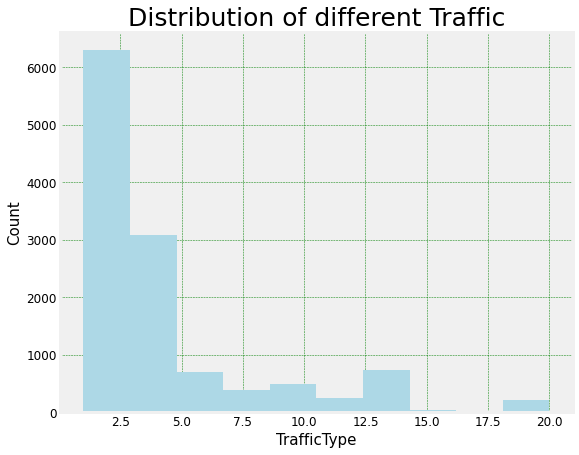

In [277]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(x = df['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 25)
plt.xlabel('TrafficType', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

### Observation 11: TrafficType 
- There are 20 different Traffic Type 
- Different type of Traffic are not normal(Gaussian) distributed. This data is exponentially distributed. So we need to take care of this type distribution

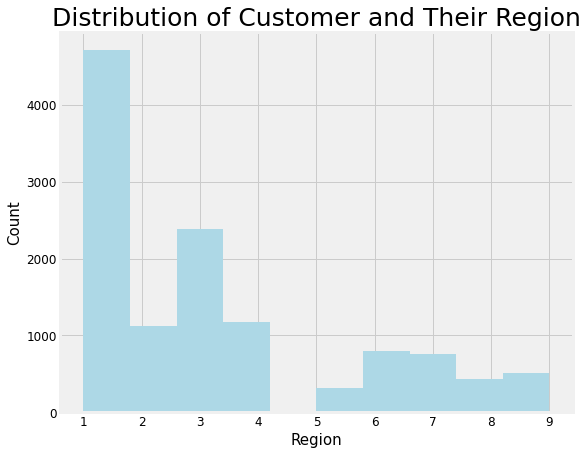

In [278]:
# visualizing the distribution of the users around the Region
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
plt.hist(df['Region'], color = 'lightblue')
plt.title('Distribution of Customer and Their Region', fontsize = 25)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### Observation 12: Region
- There are 9 different Region Codes here
- Different type of users with respect to region are not normal(Gaussian) distributed.This Regional data is exponentially distributed. So we need to take care of this type distribution

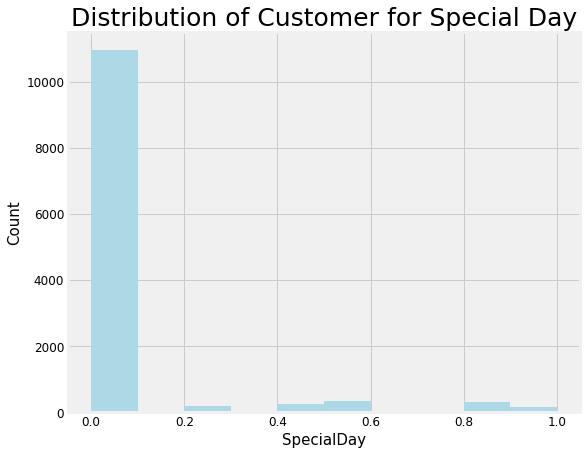

In [279]:
# visualizing the distribution of the users around the SpecialDay
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
plt.hist(df['SpecialDay'], color = 'lightblue')
plt.title('Distribution of Customer for Special Day', fontsize = 25)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### Observation 13: SpecialDay
These are the sessions to access the website on a special day of the year. From the distribution of sessions on special days, we can analyze what marketing campaign is suitable for each particular day to attract customers.

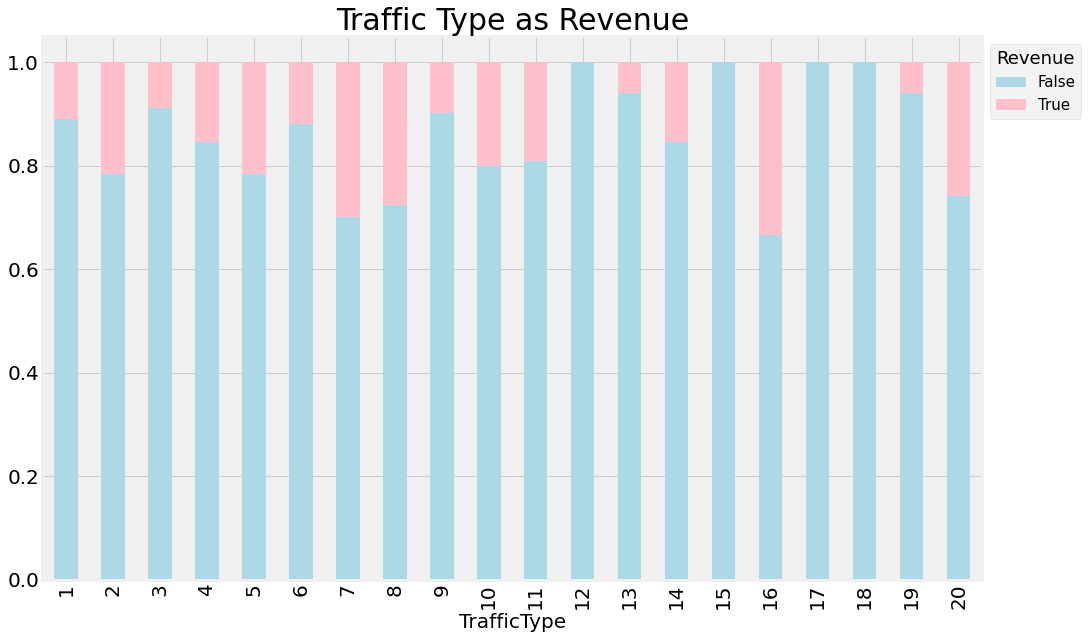

In [280]:
# bar plot for traffic type vs revenue
df_graph = pd.crosstab(df['TrafficType'], df['Revenue'])
df_graph.div(df_graph.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,
                                                           figsize = (15, 10),
                                                           color = ['lightblue', 'pink'], 
                                                           fontsize = 20)
plt.title('Traffic Type as Revenue', fontsize = 30)
plt.legend(title = 'Revenue', loc='best', bbox_to_anchor=(1, 1), fontsize = 15, title_fontsize = 18)
plt.xlabel("TrafficType", fontsize = 20)
plt.show()

### Observation 14: 
- In this graph "Traffic Type as Revenue", TrafficType becomes a categorical column
- Every category is different from others. Some of them has a significant proportion than others such as 7, 8, 16, and 20. This indicates that those aforementioned columns will be highly influenced to buy a product

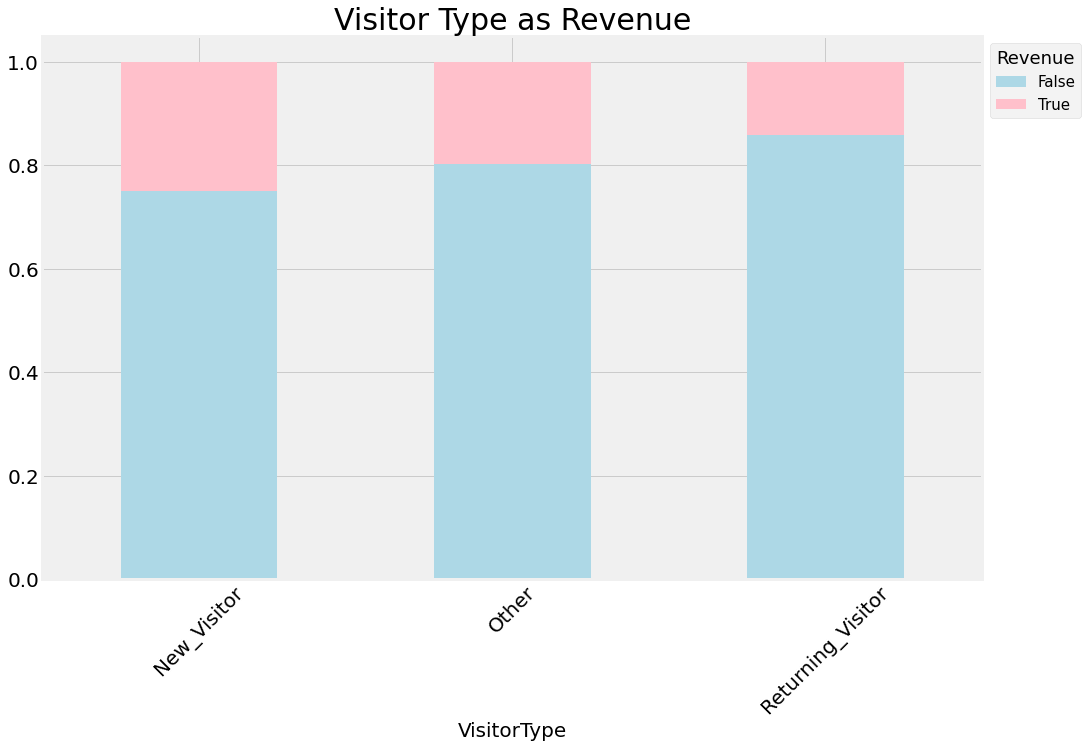

In [281]:
# bar plot for visitor type vs revenue
df_graph = pd.crosstab(df['VisitorType'], df['Revenue'])
df_graph.div(df_graph.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,
                                                           figsize = (15, 10),
                                                           color = ['lightblue', 'pink'], 
                                                           rot = 45,
                                                           fontsize = 20)
plt.title('Visitor Type as Revenue', fontsize = 30)
plt.legend(title = 'Revenue', loc='best', bbox_to_anchor=(1, 1), fontsize = 15, title_fontsize = 18)
plt.xlabel("VisitorType", fontsize = 20)
plt.show()

### Observation 15: 
- In this graph "Visitor Type as Revenue", VisitorType becomes a categorical column
- Every category is different from others. In the graph, it is depicted that New_Visitor category is the one that is influenced to purchase for a product most.

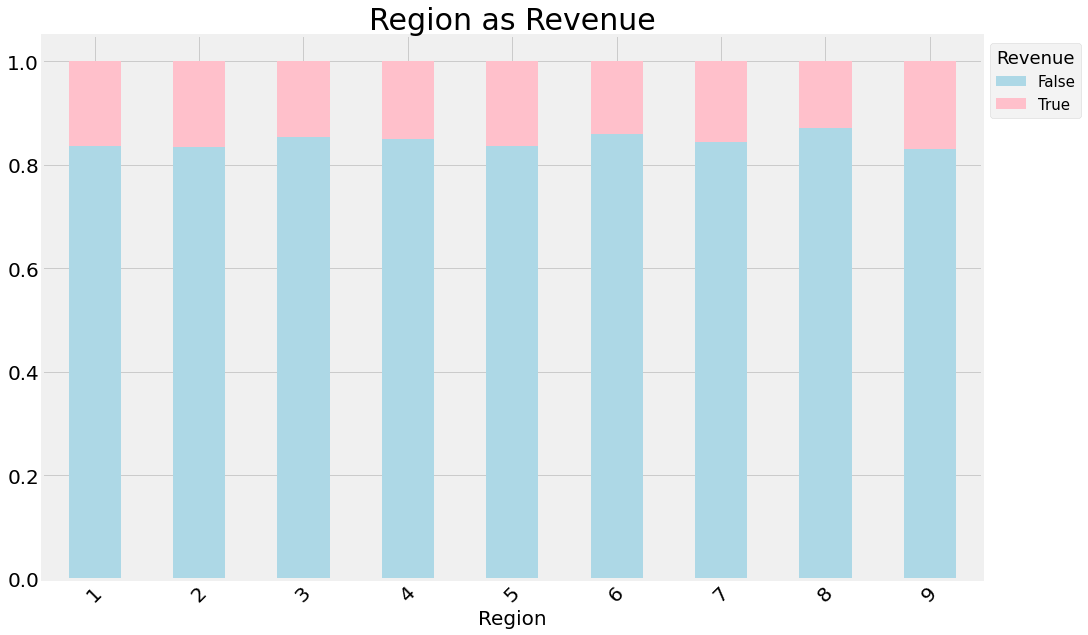

In [282]:
# bar plot for region vs revenue
df_graph = pd.crosstab(df['Region'], df['Revenue'])
df_graph.div(df_graph.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,
                                                           figsize = (15, 10),
                                                           color = ['lightblue', 'pink'], 
                                                           rot = 45,
                                                           fontsize = 20)
plt.title('Region as Revenue', fontsize = 30)
plt.legend(title = 'Revenue', loc='best', bbox_to_anchor=(1, 1), fontsize = 15, title_fontsize = 18)
plt.xlabel("Region", fontsize = 20)
plt.show()

### Observation 16: 
- In this graph "Region as Revenue", Region becomes a categorical column
- It is shown that every catogory is approximately similar to others

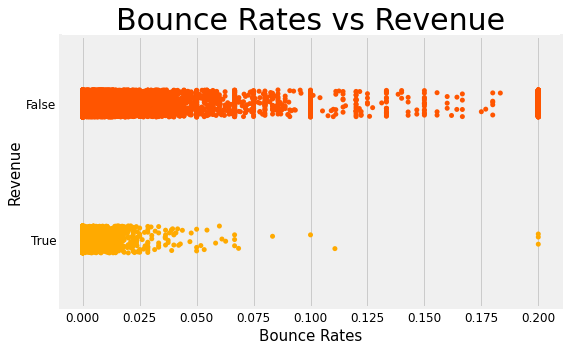

In [283]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)
sns.stripplot(x=df['BounceRates'], y=df['Revenue'], palette = 'autumn', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

### Observation 17: 
- We see here BounceRates is exponentially distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in not puchased(False) according to ExitRates.
- BounceRates is highly influenced to buy a product or not.

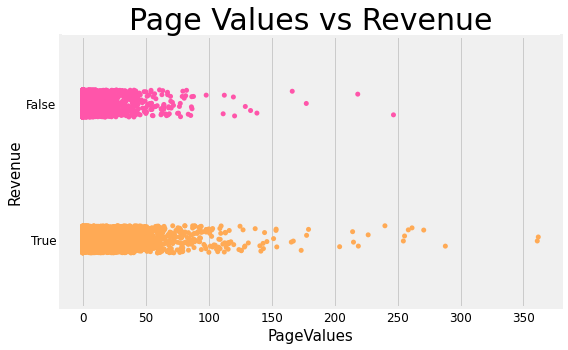

In [284]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)
sns.stripplot(x=df['PageValues'], y=df['Revenue'], palette = 'spring', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

### Observation 18: 
- We see here PageValues is exponentially distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in puchased(True) according to ExitRates.
- Most important things is here PageValues are highly influenced to purchased(True) a product.

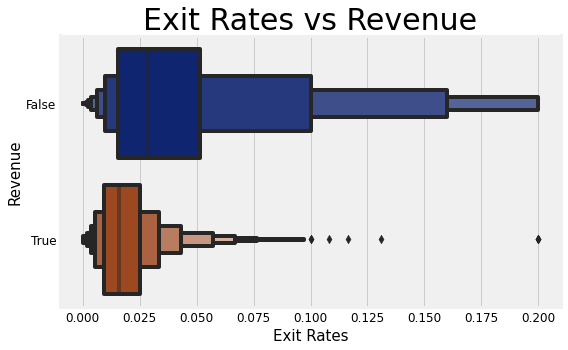

In [285]:
# boxenplot for exit rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)
sns.boxenplot(x=df['ExitRates'], y=df['Revenue'], palette = 'dark', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

### Observation 19:
- We see here ExitRates is normally(gaussian) distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in not puchased(False) according to ExitRates.

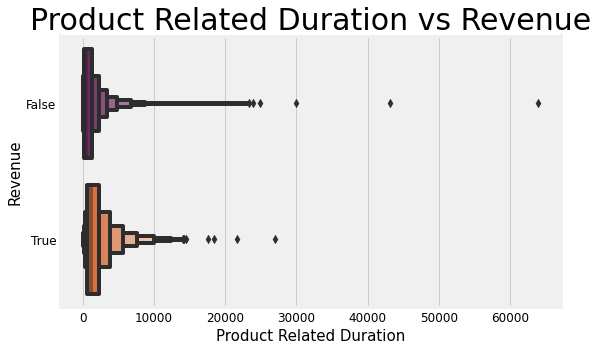

In [286]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)
sns.boxenplot(x=df['ProductRelated_Duration'], y=df['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

### Observation 20:
- We see here ProductRelatedDuration is exponentially distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in not puchased(False) according to ProductRelatedDuration.

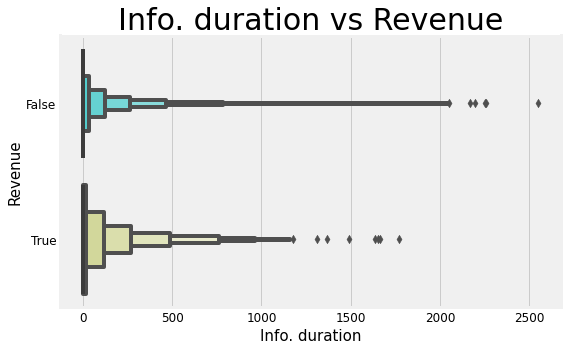

In [287]:
# boxenplot for Informational duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)
sns.boxenplot(x=df['Informational_Duration'], y=df['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

### Observation 21:
- We see here Informational_Duration is exponentially distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in not puchased(False) according to Informational_Duration.

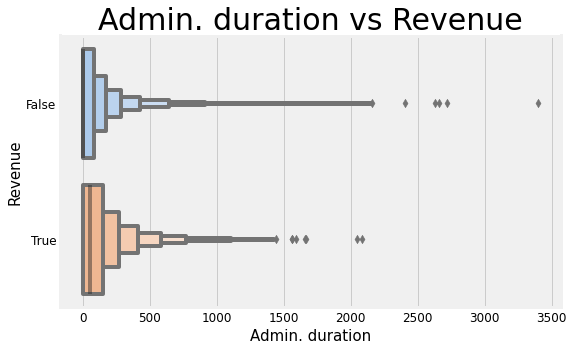

In [288]:
# boxenplot for Administrative duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)
sns.boxenplot(x=df['Administrative_Duration'], y=df['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 30)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

### Observation 22:
- We see here Administrative_Duration is exponentially distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in not puchased(False) according to Administrative_Duration.

# Task 2: Feature Engineering

In this task, I will create the feature extractor to build Machine Learning model later. In order to build a good model, it is neccessary to examine the raw input data. Technique correlation analysis will be perform. This technique will inspect which column affects the most and the least to the final answer (which is column Revenue). 

[]

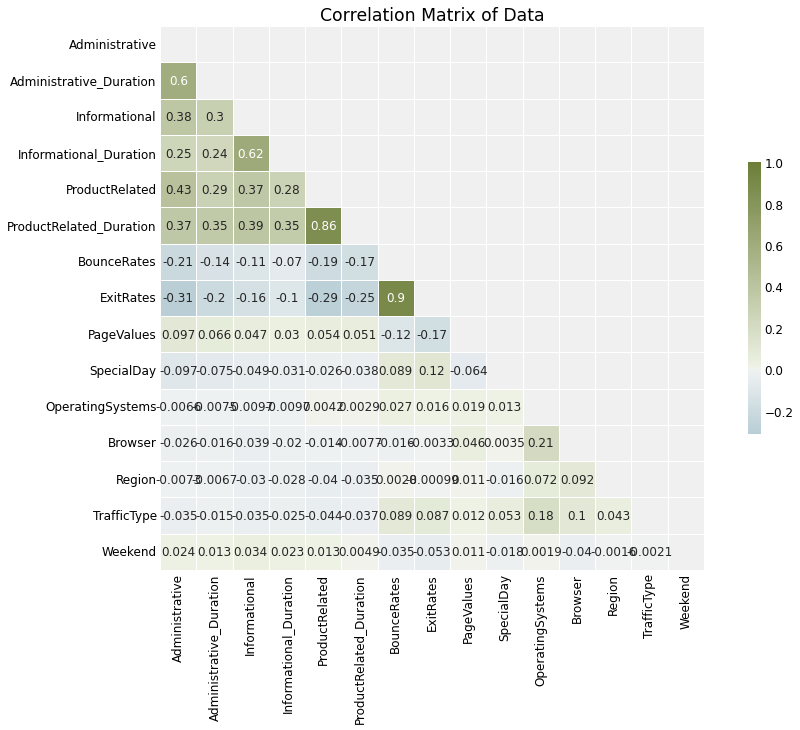

In [289]:
# Correlation matrix for all data
correlation = df.drop('Revenue', axis = 1).corr()

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (14, 10))

cmap = sns.diverging_palette(220, 100, as_cmap = True)

sns.heatmap(correlation, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

plt.plot()

In [290]:
# Absolute correlation of column data with the target column
absoluteCoor = []
variables = df.drop(df.columns[[10, 15, 17]], axis = 1).columns

for var in variables:
    absoluteCoor.append(abs(df['Revenue'].corr(df[var])))

display(pd.DataFrame([variables, absoluteCoor], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
8,PageValues,0.491894
7,ExitRates,0.20432
4,ProductRelated,0.156042
5,ProductRelated_Duration,0.150077
6,BounceRates,0.145091
0,Administrative,0.13633
2,Informational,0.093626
1,Administrative_Duration,0.091768
9,SpecialDay,0.083601
3,Informational_Duration,0.069358


From the correlation matrix of data, is it clear to see that there are some columns that act a small affect the target answer (Revenue).

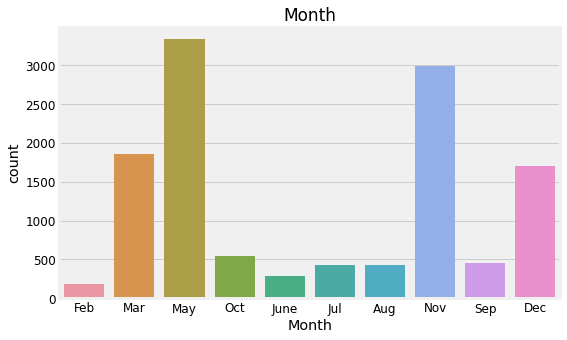

In [291]:
sns.countplot(x = df['Month'])
plt.title('Month', fontsize=17)
plt.show()

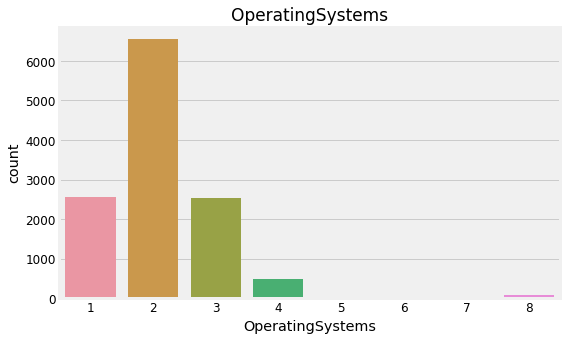

In [292]:
sns.countplot(x = df['OperatingSystems'])
plt.title('OperatingSystems', fontsize=17)
plt.show()

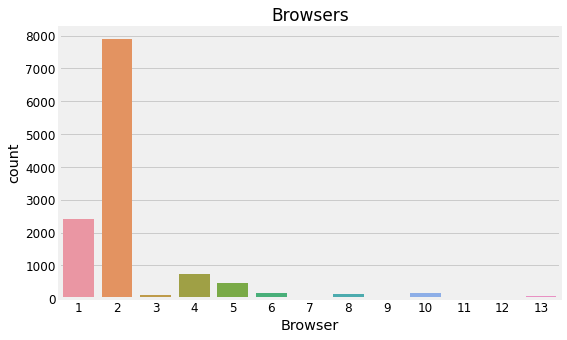

In [293]:
sns.countplot(x = df['Browser'])
plt.title('Browsers', fontsize=17)
plt.show()

We can see that column 'Month' has only 10 unique inputs, lacking of two other months. There are only 5 operating systems used, and two of them takes the majority of the dataset. Similar to 'Browser' column. 'TrafficType', 'Region', 'OperatingSystems', 'Browser', 'Weekend', 'Informational_Duration' have significantly small correlation with the target column. These columns will not be useful in the model prediction. Therefore, I will drop these columns to reduce the unnecessary features.

In [294]:
df.drop(['Month', 'VisitorType', 'TrafficType', 'Region', 'OperatingSystems', 'Browser', 'Weekend', 'Informational_Duration'], axis = 1, inplace = True)
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Revenue'],
      dtype='object')

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   ProductRelated           12205 non-null  int64  
 4   ProductRelated_Duration  12205 non-null  float64
 5   BounceRates              12205 non-null  float64
 6   ExitRates                12205 non-null  float64
 7   PageValues               12205 non-null  float64
 8   SpecialDay               12205 non-null  float64
 9   Revenue                  12205 non-null  bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 965.4 KB


# Task 3: Data Modelling

## 3.1: Classification

I am using Two classification models: Logistic and SVM to predict the likelihood of customers' behavior.

In [296]:
# Separating dependent and independent variables
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12205, 9)
Shape of y:  (12205,)


In [297]:
# Splitting the data into training and test set in the ratio of 80:20 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9764, 9)
Shape of y_train : (9764,)
Shape of x_test : (2441, 9)
Shape of y_test : (2441,)


### Model 1: Logistic Regression

[]

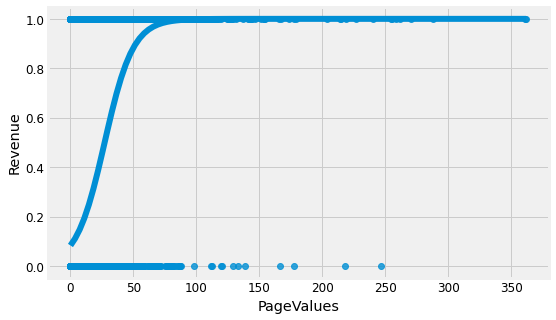

In [298]:
# Regression plot for Revenue and PageValues
sns.regplot(y=df['Revenue'], x=df['PageValues'], data=df, logistic=True, ci=None)
plt.plot()

The data is distributed logisticly in these two columns. Therefore, I will train the model based on logistic regression first.

Training Accuracy:  0.8797623924621057
Testing Accuracy:  0.8807865628840639

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2063
        True       0.76      0.34      0.47       378

    accuracy                           0.88      2441
   macro avg       0.82      0.66      0.70      2441
weighted avg       0.87      0.88      0.86      2441


Confusion Matrix:
 [[2022   41]
 [ 250  128]]

Accuracy Score:  0.881


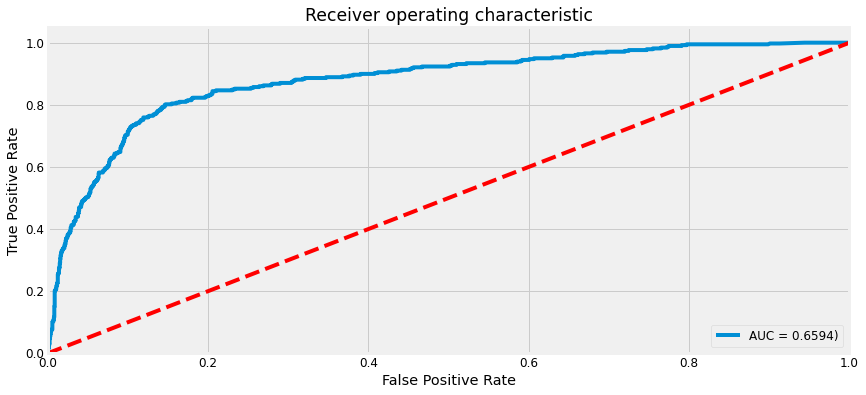

In [299]:
# model define and trainig
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy: ", model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

# Classification Report
print('\n{}'.format(classification_report(y_test, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_test, y_pred)
print('\nAccuracy Score: ', auc.round(3))

# ROC Curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'AUC = {})'.\
         format(model_roc_auc.round(4)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

This Logistic model has training accuracy 87.9% and testing accuracy 88.0%. Therefore, this training and testing set has a good outcome.

### Model 2: Support Vector Machines (SVM)

In [300]:
# model define and training
model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy: ", model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

# Classification Report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_test, y_pred)
print('\nAccuracy Score: ', auc.round(3))

Training Accuracy:  0.8461696026218762
Testing Accuracy:  0.8463744367062679
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2063
        True       1.00      0.01      0.02       378

    accuracy                           0.85      2441
   macro avg       0.92      0.50      0.47      2441
weighted avg       0.87      0.85      0.78      2441


Confusion Matrix:
 [[2063    0]
 [ 375    3]]

Accuracy Score:  0.846


This SVM model has training accuracy 84.6% and testing accuracy 84.6%. Therefore, this training and testing set has a good outcome.

### Summary Classification model

| Models      | Recall Score for Class 1 (%) | f1-score for Class 1 (%) | ROC AUC (%) | Accuracy (%) |
|-------------|--------------------------|----------------------|-----|----|
| **1. Logistic Regression** | 34 | 47 | 50 | 88.1 |
| **2. Support Vector Machine** | 1 | 2 | 50 | 84.6 |

In [301]:
precision = ['Logistic', 'precision', 0.89, 0.76]
recall = ['LogisticLogistic', 'recall', 0.98, 0.34]
f1_score = ['Logistic', 'f1_score', 0.93, 0.47]
precision2 = ['Support Vector Machine', 'precision', 0.85, 1.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.01 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.92, 0.02 ]
table = pd.DataFrame([precision, precision2, recall, recall2, f1_score, f1_score2])
table.columns = ['model_name', 'metrics', 'Revenue(False)', 'Revenue(True)']
table

,model_name,metrics,Revenue(False),Revenue(True)
0,Logistic,precision,0.89,0.76
1,Support Vector Machine,precision,0.85,1.00
2,LogisticLogistic,recall,0.98,0.34
3,Support Vector Machine,recall,1.00,0.01
4,Logistic,f1_score,0.93,0.47
5,Support Vector Machine,f1_score,0.92,0.02


Most classification models work best when the number of classes is equal since they are designed to maximize accuracy and reduce error. Thus, they do not consider the class distribution/proportion or balance of classes. In our dataset, the percentage of customers purchasing on the website (class 1) is 15.5%, whereas 84.5% of customers did not buy anything (class 0).

We apply the confusion matrix to measure a classification algorithm's performance, containing information about the actual and predicted classes. The confusion matrix will calculate based on these metrics:
- Precision: How often is it correct when it predicts a positive result? i.e., limit the number of false positives.
- Recall: How often does it correctly predict when it is the positive result? i.e., limit the number of false negatives.
- f1-score: Harmonic mean of precision and recall.

In our case, the recall metric will be more important than precision. Therefore, choosing recall and f1-score, the harmonic mean of both precision and recall, will be more reasonable for evaluation metrics, particularly for class 1.


## 3.2: Clustering

Two clustering models: K-Means and DBSCAN to predict the likelihood of customers' behavior.

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   ProductRelated           12205 non-null  int64  
 4   ProductRelated_Duration  12205 non-null  float64
 5   BounceRates              12205 non-null  float64
 6   ExitRates                12205 non-null  float64
 7   PageValues               12205 non-null  float64
 8   SpecialDay               12205 non-null  float64
 9   Revenue                  12205 non-null  bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 965.4 KB


### Model 1: K-Means 

For clustering analysis, we will learn customers' behaviour by using 3 columns: Administrative_Duration, BounceRates and ExitRates.

In [303]:
df_test = df.iloc[:, [1, 5, 6]]
df_test

,Administrative_Duration,BounceRates,ExitRates
0,0.0,0.200000,0.200000
1,0.0,0.000000,0.100000
2,0.0,0.200000,0.200000
3,0.0,0.050000,0.140000
4,0.0,0.020000,0.050000
...,...,...,...
12325,145.0,0.007143,0.029031
12326,0.0,0.000000,0.021333
12327,0.0,0.083333,0.086667
12328,75.0,0.000000,0.021053


To find the optimal number of clusters, we use Elbow curve method to determind the value.

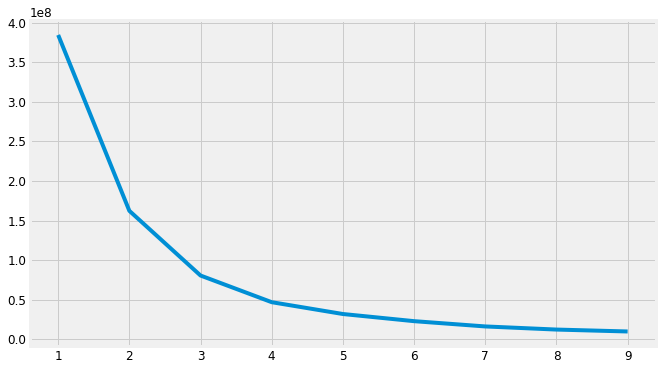

In [304]:
# Elbow-curve/SSD

ssd = []
for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_test)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), ssd)

As we can see on the graph, using Elbow curve technique, the optimal number of cluster is 3.

In [305]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(df_test)

KMeans(max_iter=100, n_clusters=3)

In [306]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [307]:
# assign the label
df_test['Cluster_Id'] = kmeans.labels_
df_test.head()

,Administrative_Duration,BounceRates,ExitRates,Cluster_Id
0,0.0,0.20,0.20,0
1,0.0,0.00,0.10,0
2,0.0,0.20,0.20,0
3,0.0,0.05,0.14,0
4,0.0,0.02,0.05,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Administrative_Duration'>

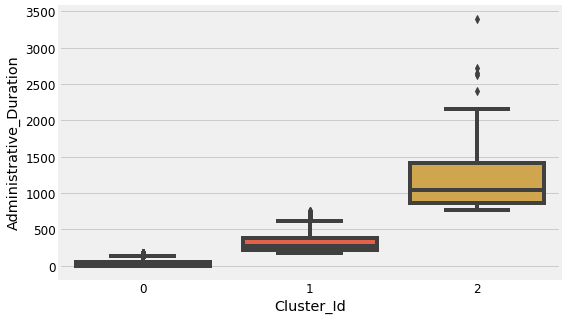

In [308]:
# Box plot to visualize Cluster Id vs Administrative_Duration
 
sns.boxplot(x='Cluster_Id', y='Administrative_Duration', data=df_test)

<AxesSubplot:xlabel='Cluster_Id', ylabel='BounceRates'>

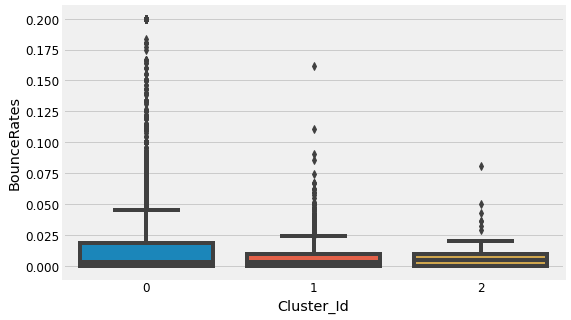

In [309]:
# Box plot to visualize Cluster Id vs BounceRates

sns.boxplot(x='Cluster_Id', y='BounceRates', data=df_test)

<AxesSubplot:xlabel='Cluster_Id', ylabel='ExitRates'>

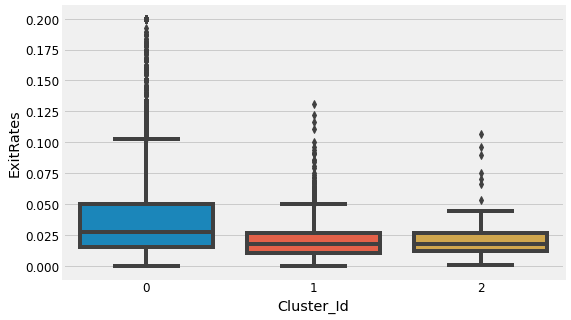

In [310]:
# Box plot to visualize Cluster Id vs ExitRates

sns.boxplot(x='Cluster_Id', y='ExitRates', data=df_test)

In [311]:
# finding the clusters based on input matrix "x"
x = df[['Administrative_Duration', 'BounceRates', 'ExitRates']].values
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [312]:
import plotly.express as px

# Plotly 3D scatter chart is almost a one-liner, but use this function to keep the params in one place
def plotly_scatter_3d(df, x, y, z, color=None):
    fig = px.scatter_3d(df, x=x, y=y, z=z, color=color,
                    opacity=0.2, template='plotly_dark', color_continuous_scale=px.colors.qualitative.Set1)
    fig.show()

In [313]:
plotly_scatter_3d(df_test, 'Administrative_Duration', 'BounceRates', 'ExitRates')

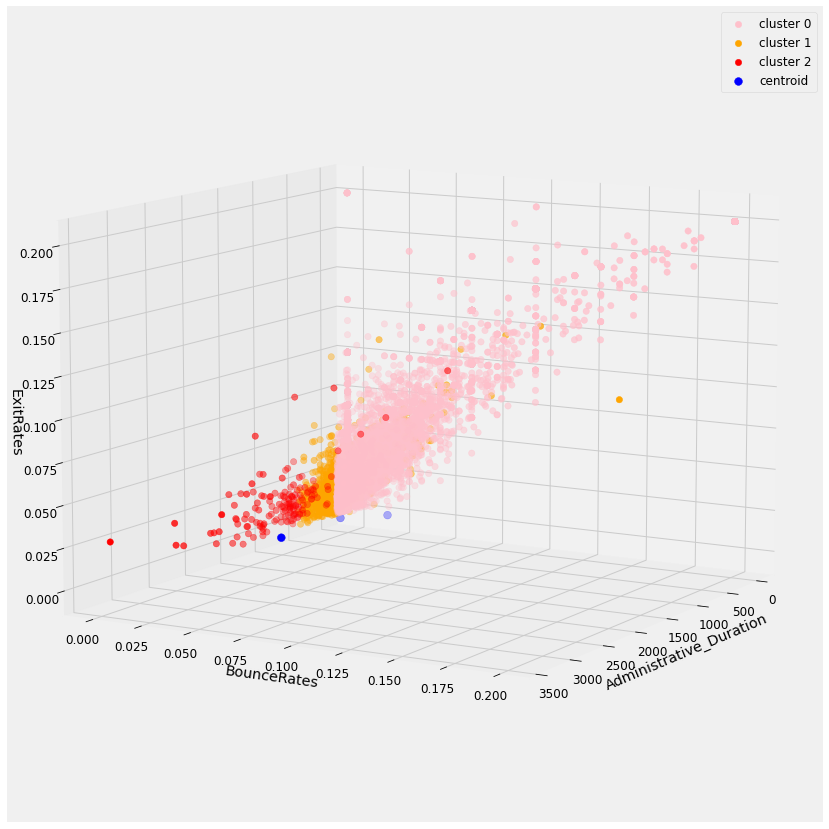

In [314]:
# 3d scatterplot using matplotlib
# for creating a responsive plot
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'pink', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'red', label = "cluster 2")
ax.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=60,c='blue',label='centroid')
ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('BounceRates')
ax.set_zlabel('ExitRates')
ax.view_init(10, 30)
ax.legend()
plt.show()

Cluster ID 0: customers that spent the least duration in administrative pages, bounce rate and exit rate higher.

Cluster ID 1: customers that spent medium duration and bounce rate and exit rate medium.

Cluster ID 2: customers that spent more time in administrative pages had less chance exiting the website.

From the 3D graph, we can find out the customers' behaviour. The more time they spent on administrative type pages, the less likely they change websites or exit from the website. 

### Model 2: DBSCAN

In [315]:
from sklearn.cluster import DBSCAN
predicted = DBSCAN(eps=0.1, min_samples=50).fit_predict(df)

In [316]:
predicted

array([ 0, -1,  0, ..., -1, -1, -1], dtype=int64)

In [317]:
# assign the label
df['Cluster_Id_DBSCAN'] = predicted
df.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Cluster_Id_DBSCAN
0,0,0.0,0,1,0.000000,0.20,0.20,0.0,0.0,False,0
1,0,0.0,0,2,64.000000,0.00,0.10,0.0,0.0,False,-1
2,0,0.0,0,1,0.000000,0.20,0.20,0.0,0.0,False,0
3,0,0.0,0,2,2.666667,0.05,0.14,0.0,0.0,False,-1
4,0,0.0,0,10,627.500000,0.02,0.05,0.0,0.0,False,-1


<AxesSubplot:xlabel='Cluster_Id_DBSCAN', ylabel='Administrative_Duration'>

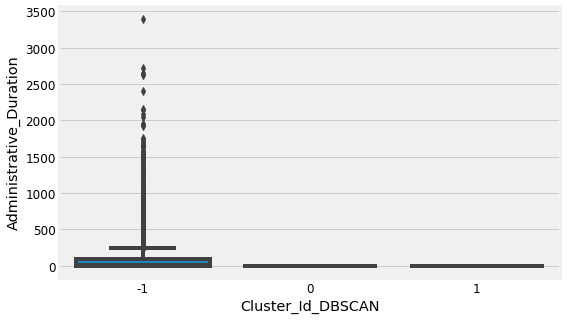

In [318]:
# Box plot to visualize Cluster Id vs Administrative_Duration

sns.boxplot(x='Cluster_Id_DBSCAN', y='Administrative_Duration', data=df)

<AxesSubplot:xlabel='Cluster_Id_DBSCAN', ylabel='ExitRates'>

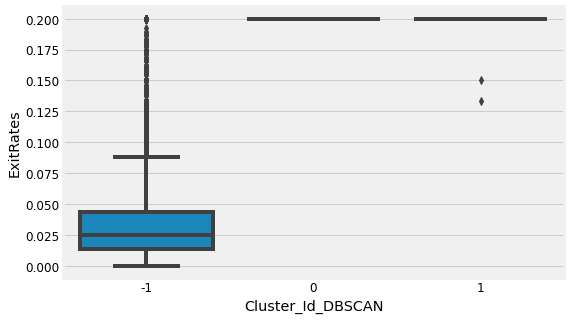

In [319]:
# Box plot to visualize Cluster Id vs ExitRates

sns.boxplot(x='Cluster_Id_DBSCAN', y='ExitRates', data=df)

<AxesSubplot:xlabel='Cluster_Id_DBSCAN', ylabel='BounceRates'>

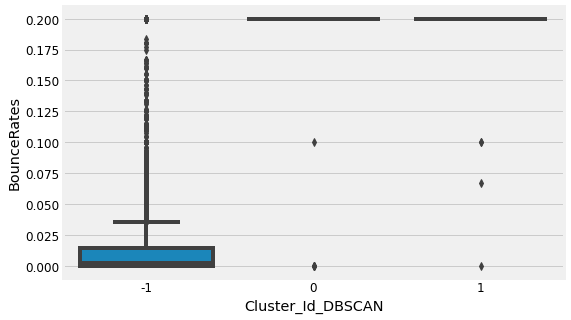

In [320]:
# Box plot to visualize Cluster Id vs BounceRates

sns.boxplot(x='Cluster_Id_DBSCAN', y='BounceRates', data=df)

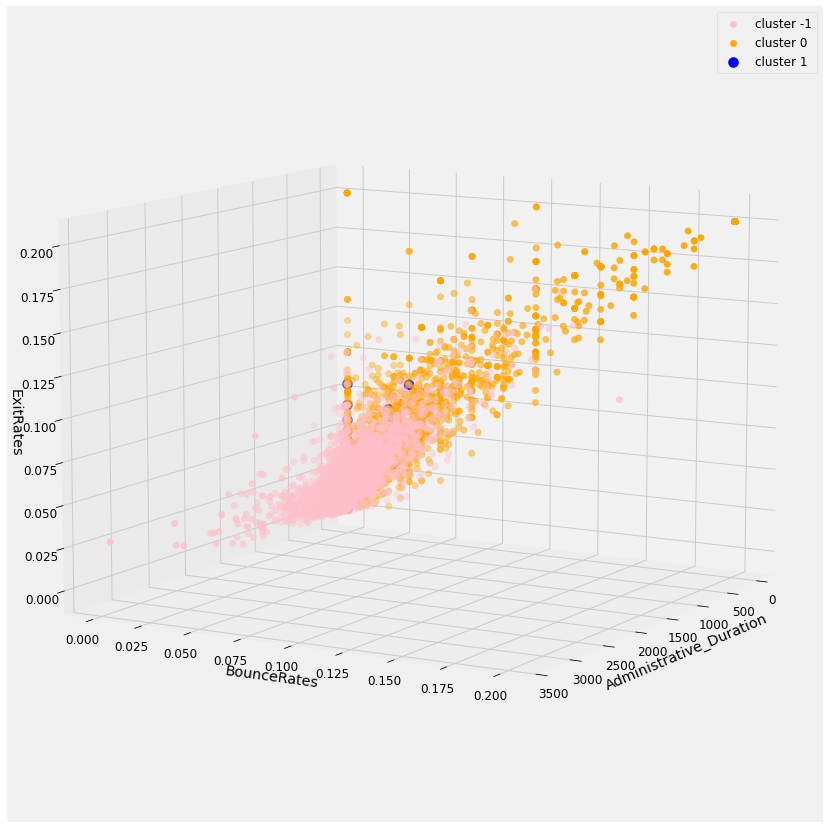

In [321]:
x_dbscan = df[['Administrative_Duration', 'BounceRates', 'ExitRates']].values
model_dbscan = DBSCAN(eps=0.1, min_samples=50)
y_clusters_dbscan = model_dbscan.fit_predict(x_dbscan)

fig_dbscan = plt.figure(figsize = (15,15))
ax_dbscan = fig_dbscan.add_subplot(111, projection='3d')
ax_dbscan.scatter(x_dbscan[y_clusters_dbscan == -1,0],x_dbscan[y_clusters_dbscan == -1,1],x_dbscan[y_clusters_dbscan == -1,2], s = 40 , color = 'pink', label = "cluster -1")
ax_dbscan.scatter(x_dbscan[y_clusters_dbscan == 0,0],x_dbscan[y_clusters_dbscan == 0,1],x_dbscan[y_clusters_dbscan == 0,2], s = 40 , color = 'orange', label = "cluster 0")
ax_dbscan.scatter(x_dbscan[y_clusters_dbscan == 1,0],x_dbscan[y_clusters_dbscan == 1,1],x_dbscan[y_clusters_dbscan == 1,2], s = 100 , color = 'blue', label = "cluster 1")
ax_dbscan.set_xlabel('Administrative_Duration')
ax_dbscan.set_ylabel('BounceRates')
ax_dbscan.set_zlabel('ExitRates')
ax_dbscan.view_init(10, 30)
ax_dbscan.legend()
plt.show()


There are 12,330 sessions in this dataset. This can be considered a small dataset. Besides, there are
outliers, so that we choose DBSCAN rather than K-Means approach to model. DBSCAN groups
the customers into small parts based on the outliers, so that we can focus on the target customers
better than K-Means.

### Recommendation

- Improve services and interactions between customers and websites to keep the users stay longer on the website, which increases the chance of purchasing products. For example: mini games to give discount codes, livestream.

- Increase related products so that customers can have more choices. 
